<a href="https://colab.research.google.com/github/mangoseeds/machine-learning/blob/main/6_K-Nearest%20Neighbor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 최근접 이웃(K-Nearest Neighbor)

* 특별한 예측 모델 없이 가장 가까운 데이터 포인트를 기반으로 예측을 수행하는 방법
* 분류와 회귀 모두 지원
* Also known as: non-parameteric model, instance-based model

![k nearest neighbor](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png)

In [1]:
import numpy as np
import pandas as pd
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [2]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.manifold import TSNE #시각화
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

## K 최근접 이웃 분류

* 입력 데이터 포인트와 가장 가까운 k개의 훈련 데이터 포인트가 출력
* k개의 데이터 포인트 중 가장 많은 클래스가 예측 결과

### 붓꽃 데이터

In [3]:
iris = load_iris()

In [4]:
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['Target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
X, y = load_iris(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [6]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)
#train은 fit하고, test는 fit 된 결과로 transform만 함

In [7]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9666666666666667
평가 데이터 점수: 0.9333333333333333


In [9]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [10]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.3416666666666667
평가 데이터 점수: 0.3


In [11]:
cross_validate(
    estimator = KNeighborsClassifier(),
    X = X, y = y,
    cv = 5, 
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.6s finished


{'fit_time': array([0.00120378, 0.00140405, 0.00094008, 0.00067377, 0.00072789]),
 'score_time': array([0.00275064, 0.0060277 , 0.00338268, 0.00208712, 0.00206232]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

In [12]:
param_grid = [{'n_neighbors': [3,5,7],
               'weights': ['uniform', 'distance'],
               'algorithm': ['ball_tree', 'kd_tree', 'brute']}]

In [13]:
gs = GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

In [14]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=2,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [15]:
gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7)

In [16]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.9800000000000001


In [17]:
def make_meshgrid(x, y, h = 0.02):
  x_min, x_max = x.min() - 1, x.max() + 1
  y_min, y_max = y.min() - 1, y.max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                       np.arange(y_min, y_max, h))
  return xx, yy

def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)
  return out

In [18]:
tsne = TSNE(n_components = 2)
X_comp = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [19]:
iris_comp_df = pd.DataFrame(data = X_comp)
iris_comp_df['Target'] = y
iris_comp_df
#저차원으로 변화된 값

,0,1,Target
0,-19.713324,-13.199154,0
1,-22.135523,-12.561393,0
2,-22.475538,-13.270883,0
3,-22.704163,-13.412560,0
4,-19.694925,-13.694976,0
...,...,...,...
145,6.310431,5.174714,2
146,9.658208,5.681106,2
147,7.449348,5.430538,2
148,6.591120,5.748239,2


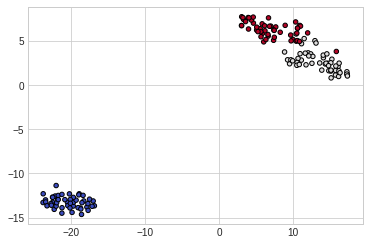

In [20]:
plt.scatter(X_comp[:, 0], X_comp[:, 1],
            c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')

In [21]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

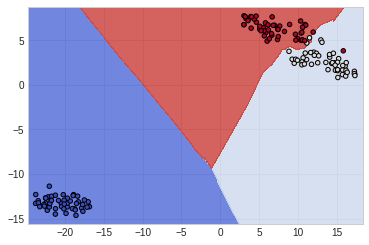

In [22]:
xx, yy = make_meshgrid(X_comp[:, 0], X_comp[:, 1])
plot_contours(model, xx, yy, cmap = plt.cm.coolwarm, alpha = 0.8)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')

### 유방암 데이터

In [23]:
cancer = load_breast_cancer()

In [24]:
cancer_df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [25]:
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [26]:
#train data set 살펴보기
cancer_train_df = pd.DataFrame(data = X_train, columns = cancer.feature_names)
cancer_train_df['target'] = y_train
cancer_train_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,11.600,24.49,74.23,417.2,0.07474,0.05688,0.01974,0.013130,0.1935,0.05878,...,31.62,81.39,476.5,0.09545,0.1361,0.07239,0.04815,0.3244,0.06745,1
1,22.010,21.90,147.20,1482.0,0.10630,0.19540,0.24480,0.150100,0.1824,0.06140,...,25.80,195.00,2227.0,0.12940,0.3885,0.47560,0.24320,0.2741,0.08574,0
2,11.060,14.83,70.31,378.2,0.07741,0.04768,0.02712,0.007246,0.1535,0.06214,...,20.35,80.79,496.7,0.11200,0.1879,0.20790,0.05556,0.2590,0.09158,1
3,20.260,23.03,132.40,1264.0,0.09078,0.13130,0.14650,0.086830,0.2095,0.05649,...,31.59,156.10,1750.0,0.11900,0.3539,0.40980,0.15730,0.3689,0.08368,0
4,9.731,15.34,63.78,300.2,0.10720,0.15990,0.41080,0.078570,0.2548,0.09296,...,19.49,71.04,380.5,0.12920,0.2772,0.82160,0.15710,0.3108,0.12590,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,13.610,24.69,87.76,572.6,0.09258,0.07862,0.05285,0.030850,0.1761,0.06130,...,35.64,113.20,848.7,0.14710,0.2884,0.37960,0.13290,0.3470,0.07900,0
451,12.830,15.73,82.89,506.9,0.09040,0.08269,0.05835,0.030780,0.1705,0.05913,...,19.35,93.22,605.8,0.13260,0.2610,0.34760,0.09783,0.3006,0.07802,1
452,11.410,10.82,73.34,403.3,0.09373,0.06685,0.03512,0.026230,0.1667,0.06113,...,15.97,83.74,510.5,0.15480,0.2390,0.21020,0.08958,0.3016,0.08523,1
453,13.460,28.21,85.89,562.1,0.07517,0.04726,0.01271,0.011170,0.1421,0.05763,...,35.63,97.11,680.6,0.11080,0.1457,0.07934,0.05781,0.2694,0.07061,1


In [27]:
#test data set 살펴보기
cancer_test_df = pd.DataFrame(data = X_test, columns = cancer.feature_names)
cancer_test_df['target'] = y_test
cancer_test_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.032630,0.1727,0.06317,...,28.03,113.80,973.1,0.13010,0.32990,0.36300,0.12260,0.3175,0.09772,0
1,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.040790,0.1594,0.05986,...,20.24,117.70,989.5,0.14910,0.33310,0.33270,0.12520,0.3415,0.09740,0
2,13.73,22.61,93.60,578.3,0.11310,0.22930,0.21280,0.080250,0.2069,0.07682,...,32.01,108.80,697.7,0.16510,0.77250,0.69430,0.22080,0.3596,0.14310,0
3,10.95,21.35,71.90,371.1,0.12270,0.12180,0.10440,0.056690,0.1895,0.06870,...,35.34,87.22,514.0,0.19090,0.26980,0.40230,0.14240,0.2964,0.09606,0
4,10.90,12.96,68.69,366.8,0.07515,0.03718,0.00309,0.006588,0.1442,0.05743,...,18.20,78.07,470.0,0.11710,0.08294,0.01854,0.03953,0.2738,0.07685,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,19.45,19.33,126.50,1169.0,0.10350,0.11880,0.13790,0.085910,0.1776,0.05647,...,24.57,163.10,1972.0,0.14970,0.31610,0.43170,0.19990,0.3379,0.08950,0
110,12.96,18.29,84.18,525.2,0.07351,0.07899,0.04057,0.018830,0.1874,0.05899,...,24.61,96.31,621.9,0.09329,0.23180,0.16040,0.06608,0.3207,0.07247,1
111,17.60,23.33,119.00,980.5,0.09289,0.20040,0.21360,0.100200,0.1696,0.07369,...,28.87,143.60,1437.0,0.12070,0.47850,0.51650,0.19960,0.2301,0.12240,0
112,18.22,18.87,118.70,1027.0,0.09746,0.11170,0.11300,0.079500,0.1807,0.05664,...,25.00,140.90,1485.0,0.14340,0.27630,0.38530,0.17760,0.2812,0.08198,0


In [28]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [29]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9516483516483516
평가 데이터 점수: 0.9210526315789473


In [31]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [32]:
print("학습 데이터 점수: {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수: 0.9846153846153847
평가 데이터 점수: 0.9298245614035088


In [33]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

In [34]:
cross_validate(
    estimator = estimator,
    X=X, y=y,
    cv = 5,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.00262451, 0.00245404, 0.00149465, 0.00165558, 0.00149035]),
 'score_time': array([0.01553512, 0.01002121, 0.01533747, 0.00828505, 0.00667787]),
 'test_score': array([0.96491228, 0.95614035, 0.98245614, 0.95614035, 0.96460177])}

In [35]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', KNeighborsClassifier())])

In [36]:
param_grid = [{'model__n_neighbors': [3,5,7],
               'model__weights': ['uniform', 'distance'],
               'model__algorithm': ['ball_tree', 'kd_tree', 'brute']}]

In [37]:
gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

In [38]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=2,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [39]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7))])

In [40]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.9701288619779538


In [41]:
tsne = TSNE(n_components = 2)
X_comp = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [42]:
cancer_comp_df = pd.DataFrame(data = X_comp)
cancer_comp_df['target'] = y
cancer_comp_df

,0,1,target
0,-1.257988,32.400261,0
1,-2.609046,29.943659,0
2,1.809447,28.076178,0
3,-11.214126,-20.369900,0
4,2.169075,25.604610,0
...,...,...,...
564,-4.327199,30.035583,0
565,0.683562,27.833775,0
566,15.512710,15.802582,0
567,-0.540068,29.098433,0


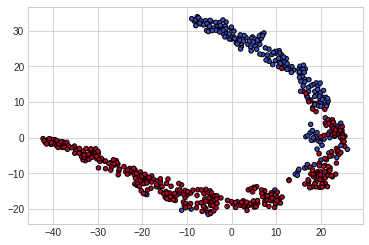

In [43]:
plt.scatter(X_comp[:, 0], X_comp[:, 1], c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k');

In [44]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

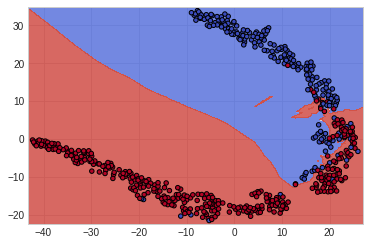

In [45]:
xx, yy = make_meshgrid(X_comp[:, 0], X_comp[:, 1])
plot_contours(model, xx, yy, cmap = plt.cm.coolwarm, alpha = 0.8)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k');

Wine data

In [46]:
from sklearn.datasets import load_wine
wine = load_wine()

In [47]:
wine_df = pd.DataFrame(data = wine.data, columns = wine.feature_names)
wine_df['target'] = wine.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [48]:
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [49]:
#train data set 살펴보기
wine_train_df = pd.DataFrame(data = X_train, columns = wine.feature_names)
wine_train_df['target'] = y_train
wine_train_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
1,13.07,1.50,2.10,15.5,98.0,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020.0,0
2,12.08,1.33,2.30,23.6,70.0,2.20,1.59,0.42,1.38,1.74,1.07,3.21,625.0,1
3,12.72,1.75,2.28,22.5,84.0,1.38,1.76,0.48,1.63,3.30,0.88,2.42,488.0,1
4,11.84,2.89,2.23,18.0,112.0,1.72,1.32,0.43,0.95,2.65,0.96,2.52,500.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,12.07,2.16,2.17,21.0,85.0,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378.0,1
138,13.03,0.90,1.71,16.0,86.0,1.95,2.03,0.24,1.46,4.60,1.19,2.48,392.0,1
139,13.11,1.01,1.70,15.0,78.0,2.98,3.18,0.26,2.28,5.30,1.12,3.18,502.0,1
140,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0,1


In [50]:
#test data set 살펴보기
wine_test_df = pd.DataFrame(data = X_test, columns = wine.feature_names)
wine_test_df['target'] = y_test
wine_test_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.050,2.85,1450.0,0
1,13.72,1.43,2.50,16.7,108.0,3.40,3.67,0.19,2.04,6.80,0.890,2.87,1285.0,0
2,14.30,1.92,2.72,20.0,120.0,2.80,3.14,0.33,1.97,6.20,1.070,2.65,1280.0,0
3,13.36,2.56,2.35,20.0,89.0,1.40,0.50,0.37,0.64,5.60,0.700,2.47,780.0,2
4,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.080,2.27,480.0,1
5,13.05,2.05,3.22,25.0,124.0,2.63,2.68,0.47,1.92,3.58,1.130,3.20,830.0,0
6,12.86,1.35,2.32,18.0,122.0,1.51,1.25,0.21,0.94,4.10,0.760,1.29,630.0,2
7,12.21,1.19,1.75,16.8,151.0,1.85,1.28,0.14,2.50,2.85,1.280,3.07,718.0,1
8,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.740,1.80,750.0,2
9,12.29,1.61,2.21,20.4,103.0,1.10,1.02,0.37,1.46,3.05,0.906,1.82,870.0,1


In [51]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [52]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [53]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.8028169014084507
평가 데이터 점수: 0.5833333333333334


In [54]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [55]:
print("학습 데이터 점수: {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수: 0.9788732394366197
평가 데이터 점수: 0.8888888888888888


In [56]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', KNeighborsClassifier())])

In [57]:
param_grid = [{'model__n_neighbors': [3,5,7],
               'model__weights': ['uniform', 'distance'],
               'model__algorithm': ['ball_tree', 'kd_tree', 'brute']}]

In [58]:
gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

In [59]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=2,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [60]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7))])

In [61]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.9665079365079364


In [62]:
tsne = TSNE(n_components = 2)
X_comp = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [63]:
wine_comp_df = pd.DataFrame(data = X_comp)
wine_comp_df['target'] = y
wine_comp_df

,0,1,target
0,-9.279517,-6.157004,0
1,-9.120696,-5.813531,0
2,-11.017278,-7.453938,0
3,-12.377290,-9.807992,0
4,-3.457127,0.086593,0
...,...,...,...
173,-3.765692,0.366769,2
174,-3.987445,0.009678,2
175,-5.563724,-2.034244,2
176,-5.629402,-2.195475,2


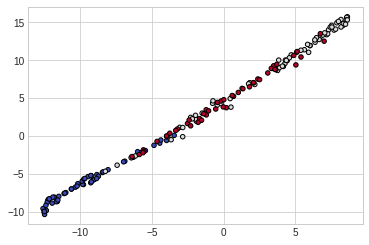

In [64]:
plt.scatter(X_comp[:, 0], X_comp[:, 1], c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k');

In [65]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

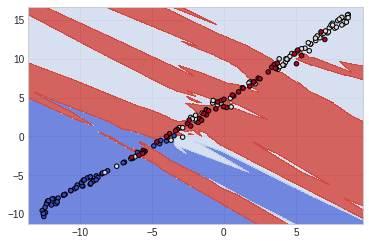

In [66]:
xx, yy = make_meshgrid(X_comp[:, 0], X_comp[:, 1])
plot_contours(model, xx, yy, cmap = plt.cm.coolwarm, alpha = 0.8)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k');

## k 최근접 이웃 회귀

* k 최근접 이웃 분류와 마찬가지로 예측에 이웃 데이터 포인트 사용
* 이웃 데이터 포인트의 평균이 예측 결과

### 캘리포니아 주택 가격 데이터

In [67]:
california = fetch_california_housing()

In [68]:
california_df = pd.DataFrame(data = california.data, columns = california.feature_names)
california_df['TARGET'] = california.target
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [69]:
X, y = california.data, california.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [70]:
california_train_df = pd.DataFrame(data = X_train, columns = california.feature_names)
california_train_df['TARGET'] = y_train
california_train_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,6.5413,12.0,7.489655,0.967816,1464.0,3.365517,33.60,-117.69,3.320
1,2.7464,21.0,3.826455,1.121693,2515.0,2.661376,33.97,-118.37,1.531
2,4.9091,43.0,5.051225,0.975501,1151.0,2.563474,37.54,-122.29,2.932
3,1.7514,34.0,2.660137,1.091087,2991.0,2.929481,34.09,-118.29,1.875
4,4.1029,19.0,4.032995,1.068528,1118.0,2.837563,33.65,-117.91,2.134
...,...,...,...,...,...,...,...,...,...
16507,2.6310,29.0,5.148024,1.027754,3595.0,3.023549,39.16,-123.22,1.096
16508,2.8306,29.0,4.713799,1.042589,1437.0,2.448041,32.75,-117.05,1.429
16509,3.4531,44.0,5.778802,1.161290,498.0,2.294931,37.98,-122.03,1.489
16510,8.8636,12.0,7.717778,1.035556,1569.0,3.486667,33.59,-117.68,3.140


In [71]:
california_test_df = pd.DataFrame(data = X_test, columns = california.feature_names)
california_test_df['TARGET'] = y_test
california_test_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,1.6875,52.0,4.703226,1.032258,395.0,2.548387,37.84,-122.28,1.320
1,0.9914,10.0,3.637450,1.055777,508.0,2.023904,36.68,-121.66,1.475
2,5.1529,32.0,6.337478,1.049734,1741.0,3.092362,34.19,-118.63,2.596
3,4.1250,32.0,6.151282,0.984615,1199.0,3.074359,34.20,-118.86,2.646
4,3.4419,15.0,5.389399,1.109541,3823.0,2.701767,33.87,-117.60,1.381
...,...,...,...,...,...,...,...,...,...
4123,1.1750,52.0,4.958159,1.087866,635.0,2.656904,36.76,-119.79,0.561
4124,1.6840,41.0,4.226629,0.991501,804.0,2.277620,39.14,-121.59,0.713
4125,3.4125,30.0,4.489011,1.024725,771.0,2.118132,33.65,-117.90,2.841
4126,5.1721,17.0,7.501119,1.035794,1417.0,3.170022,38.74,-121.16,2.371


In [72]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
#이미 fit 했으니 test는 scaler transform 만
X_test_scale = scaler.transform(X_test)

In [73]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor()

In [74]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.45030865545728405
평가 데이터 점수: 0.139553660929419


In [75]:
#전처리 하고 모델 다시 돌려보기
model = KNeighborsRegressor()
model.fit(X_train_scale, y_train)

KNeighborsRegressor()

In [76]:
print("학습 데이터 점수: {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수: 0.7944462160431268
평가 데이터 점수: 0.6781265203288662


In [77]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

In [78]:
cross_validate(
    estimator = estimator,
    X=X, y=y,
    cv = 5,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.3s finished


{'fit_time': array([0.03630447, 0.03835487, 0.03378701, 0.03390408, 0.04780126]),
 'score_time': array([0.50235581, 0.40828776, 0.45705438, 0.53406763, 0.33816004]),
 'test_score': array([0.47879396, 0.4760079 , 0.57624554, 0.50259828, 0.57228584])}

In [79]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', KNeighborsRegressor())])

In [80]:
param_grid = [{'model__n_neighbors': [3,5,7],
               'model__weights': ['uniform', 'distance'],
               'model__algorithm': ['ball_tree', 'kd_tree', 'brute']}]

In [81]:
gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

In [82]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=2,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [83]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7,
                                     weights='distance'))])

In [84]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.5376515274379832


In [85]:
tsne = TSNE(n_components = 1) #regressor는 클래스 구분이 없으니 1
X_comp = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [86]:
california_comp_df = pd.DataFrame(data = X_comp)
california_comp_df['target'] = y
california_comp_df

,0,target
0,15.939005,4.526
1,-77.476044,3.585
2,29.589277,3.521
3,58.383560,3.413
4,58.916340,3.422
...,...,...
20635,24.312416,0.781
20636,17.223640,0.771
20637,10.993076,0.923
20638,82.701370,0.847


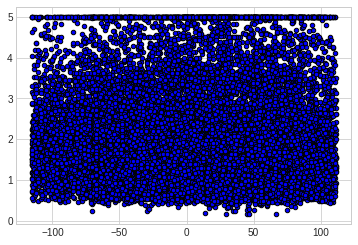

In [87]:
plt.scatter(X_comp, y, c = 'b', cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k');

In [88]:
model = KNeighborsRegressor()
model.fit(X_comp, y)
predict = model.predict(X_comp)

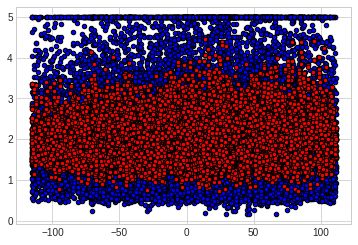

In [89]:
plt.scatter(X_comp, y, c = 'b', cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k');
plt.scatter(X_comp, predict, c = 'r', cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k');